## **Project Overview**

This Retail Sales Forecast project analyzes transaction-level data to uncover key trends by product category, gender, and location. Using Python and SQL, I:

- Explored customer sales behavior by gender and state
- Built a time series forecasting model using Prophet to project future monthly revenue
- Visualized sales insights using line charts and forecast bands
- Complemented the visual analysis with SQL-based business queries

The project helps businesses plan more effectively around seasonal demand and demographic driven performance.


In [2]:
# Install
!pip install pandas openpyxl matplotlib statsmodels --quiet

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.xlsx to retail_sales_dataset.xlsx


## **Data Preview**

I begin by loading the dataset and inspecting the first few rows to understand the structure and contents.

- **Key fields** include: `Date`, `Product Category`, `Gender`, `Total Amount`, and `State`.
- Dataset contains over 400 transactions recorded across multiple U.S. states.



In [8]:
import pandas as pd

df = pd.read_excel('retail_sales_dataset.xlsx')

# Preview data
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,State
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,GA
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,CA
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,NY
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,PA
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,PA


In [9]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Month and calculate monthly revenue
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index()
monthly_revenue['Date'] = monthly_revenue['Date'].dt.to_timestamp()

# Preview the result
monthly_revenue


,Date,Total Amount
0,2023-01-01,35450
1,2023-02-01,44060
2,2023-03-01,28990
3,2023-04-01,33870
4,2023-05-01,53150
5,2023-06-01,36715
6,2023-07-01,35465
7,2023-08-01,36960
8,2023-09-01,23620
9,2023-10-01,46580


## Step 2: Prepare Monthly Revenue Data for Forecasting

To forecast retail sales, first need to aggregate total revenue by month to observe long-term patterns and trends in purchasing behavior.


In [10]:
# Convert Date column to datetime for proper time series processing
df['Date'] = pd.to_datetime(df['Date'])

# Group data by month and compute total revenue for each month
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index()

# Convert period back to timestamp for plotting compatibility
monthly_revenue['Date'] = monthly_revenue['Date'].dt.to_timestamp()

# Preview the monthly aggregated dataset
monthly_revenue


,Date,Total Amount
0,2023-01-01,35450
1,2023-02-01,44060
2,2023-03-01,28990
3,2023-04-01,33870
4,2023-05-01,53150
5,2023-06-01,36715
6,2023-07-01,35465
7,2023-08-01,36960
8,2023-09-01,23620
9,2023-10-01,46580


## Step 3: Forecast Monthly Revenue Using Prophet

To predict future sales trends, I will use Facebook's Prophet library for modeling time series data and generating interpretable forecasts.


In [11]:
# Install Prophet
!pip install --quiet prophet

# Import libraries
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt



In [12]:
# Prepare data for Prophet
prophet_df = monthly_revenue.rename(columns={
    'Date': 'date',
    'Total Amount': 'Total'
})
prophet_df.head()


,date,Total
0,2023-01-01,35450
1,2023-02-01,44060
2,2023-03-01,28990
3,2023-04-01,33870
4,2023-05-01,53150


## **Forecast Model**

I used the **Prophet time series library** to forecast monthly revenue.

- Data was aggregated monthly
- A forecast was generated using Prophet’s additive model
- Visualizations show the revenue trend and future estimates with a 95% confidence band

Helps in anticipating slow seasons and planning marketing or inventory strategies.


In [12]:
model = Prophet()
model.fit(prophet_df)

# Make a future dataframe — extend 6 months ahead
future = model.make_future_dataframe(periods=6, freq='M')

# Forecast future values
forecast = model.predict(future)

# Preview forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzr2pn3ir/b49am9co.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzr2pn3ir/u6y47pm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49353', 'data', 'file=/tmp/tmpzr2pn3ir/b49am9co.json', 'init=/tmp/tmpzr2pn3ir/u6y47pm3.json', 'output', 'file=/tmp/tmpzr2pn3ir/prophet_model9ikghxn0/prophet_model-20250607155215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:52:15 - cmdstanpy - INFO - Chain [1] start processing
IN

,ds,yhat,yhat_lower,yhat_upper
14,2024-02-29,26522.506472,11258.572427,40916.239575
15,2024-03-31,25423.058971,10519.702208,41365.328687
16,2024-04-30,24359.077519,10615.837381,39650.078200
17,2024-05-31,23259.630019,9454.021925,37615.275586
18,2024-06-30,22195.648567,6962.216991,37005.407715


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


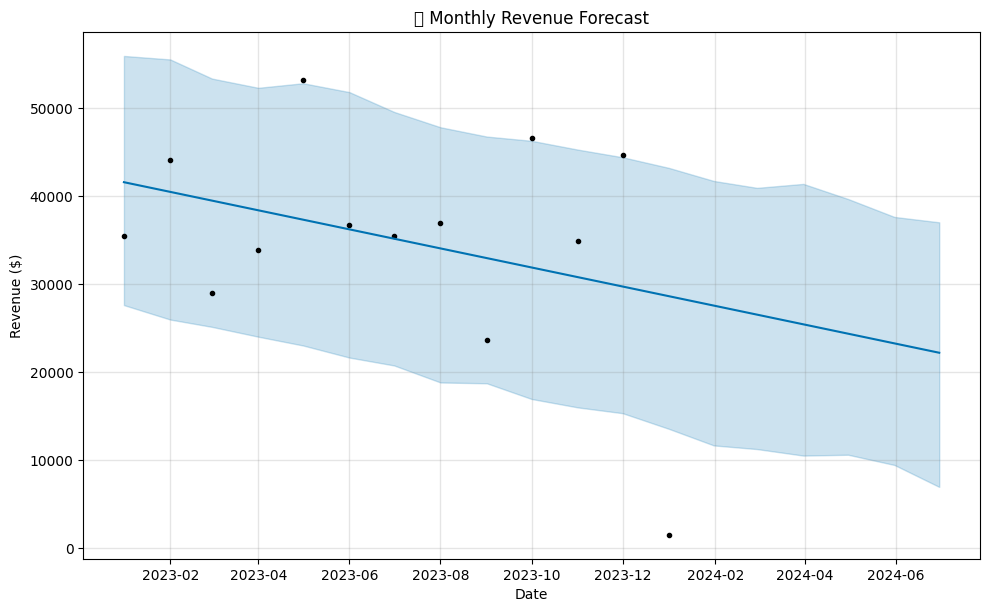

In [13]:
# Visualize the forecast
fig = model.plot(forecast)
plt.title('📈 Monthly Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()


## **SQL Insights**

I connected a temporary SQLite database and ran several SQL queries to uncover specific insights:

- **Query 1: Revenue by Gender**  
  Female customers contributed slightly more revenue than male customers.
  
- **Query 2: Revenue by Product Category**  
  Clothing was the top-performing category, followed by Electronics.

- **Query 3: Revenue by State**  
  California and New York showed the highest sales volumes.


In [20]:
df.columns



Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'State'],
      dtype='object')

### Query 1: Revenue by Gender

This query calculates total revenue contributed by each gender group.



In [25]:
query1 = """
SELECT Gender, SUM([Total Amount]) AS Revenue
FROM retail_sales
GROUP BY Gender;
"""

pd.read_sql(query1, conn)


,Gender,Revenue
0,Female,232840
1,Male,223160


In [18]:
import sqlite3

# Creat memory
conn = sqlite3.connect(':memory:')
df.to_sql('retail_sales', conn, index=False)

query = """
SELECT
    State,
    SUM([Total Amount]) AS Total_Revenue
FROM
    retail_sales
GROUP BY
    State
ORDER BY
    Total_Revenue DESC
LIMIT 10;
"""

# Run and view
top_states = pd.read_sql(query, conn)
top_states


,State,Total_Revenue
0,PA,55340
1,CA,51225
2,FL,50150
3,NY,48840
4,NC,48190
5,OH,44205
6,IL,43055
7,TX,42715
8,MI,42445
9,GA,29835


In [26]:
query2 = """
SELECT [Product Category], SUM([Total Amount]) AS Revenue
FROM retail_sales
GROUP BY [Product Category];
"""

pd.read_sql(query2, conn)


,Product Category,Revenue
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


In [27]:
query3 = """
SELECT strftime('%Y-%m', [Date]) AS Month, SUM([Total Amount]) AS Revenue
FROM retail_sales
GROUP BY Month
ORDER BY Month;
"""

monthly_revenue = pd.read_sql(query3, conn)
monthly_revenue.head()


,Month,Revenue
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150


## **Visualizations**

Using Matplotlib and Prophet’s built-in plotting tools, we created:

- Monthly Revenue Trend chart
- Sales Forecast with prediction intervals
- Gender-based revenue comparisons

These visuals help stakeholders quickly grasp high-level patterns and future expectations.



Query 3: Monthly Revenue Trend

This query helps track revenue over time to identify seasonality or trends.



<ipython-input-28-534f2d331f79>:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


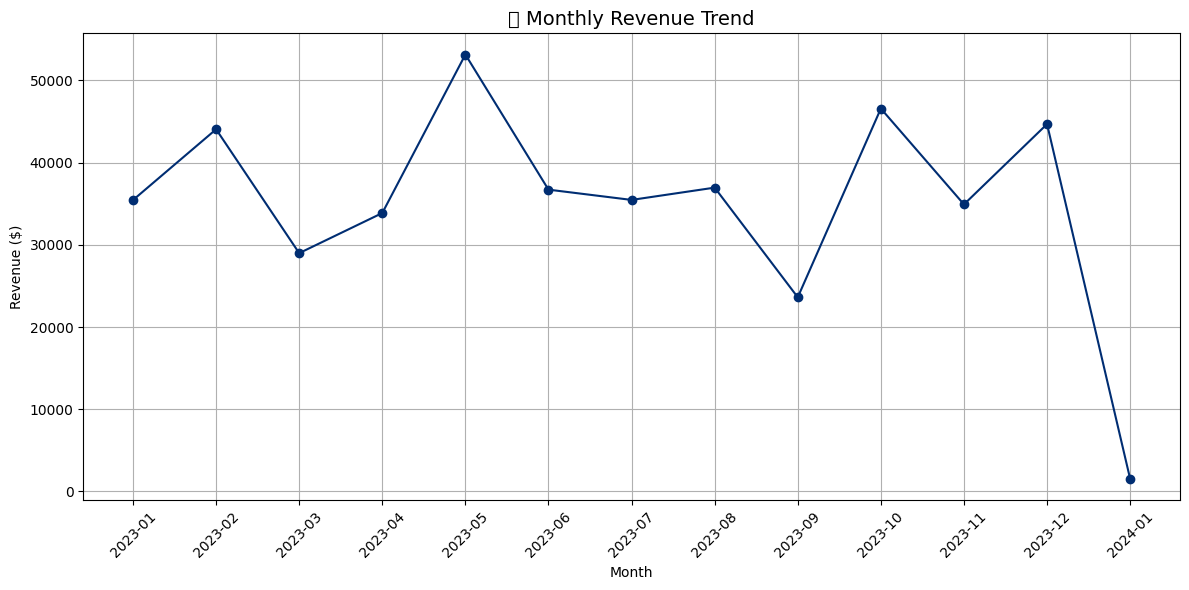

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color='#002d72')
plt.title('📈 Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Chart: Total Revenue by Product Category
This chart helps identify which product categories are driving the most revenue, which can support decisions around inventory investment and promotions.

# Chart: Sales by Product Category and Gender
This breakdown reveals gender-based buying behavior within each category, offering opportunities for more personalized marketing strategies.


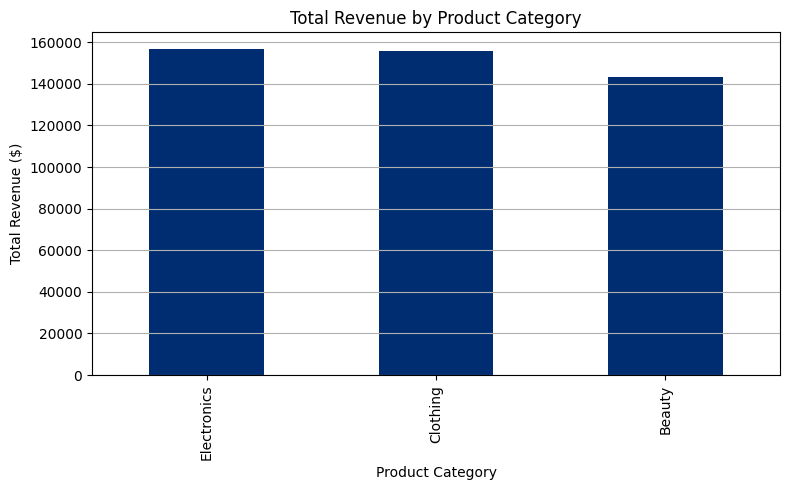

In [14]:
import matplotlib.pyplot as plt

# Group and sum revenue by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='#002d72')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


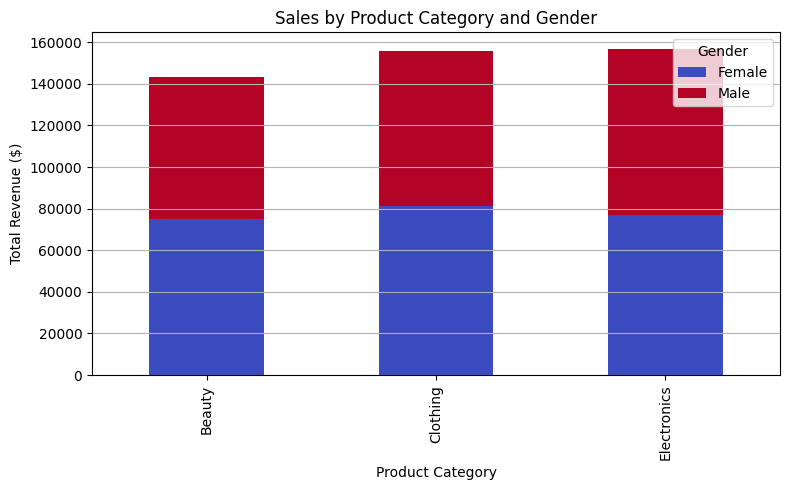

In [15]:
# Pivot table: Gender vs. Product Category
pivot = df.pivot_table(index='Product Category', columns='Gender', values='Total Amount', aggfunc='sum').fillna(0)

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


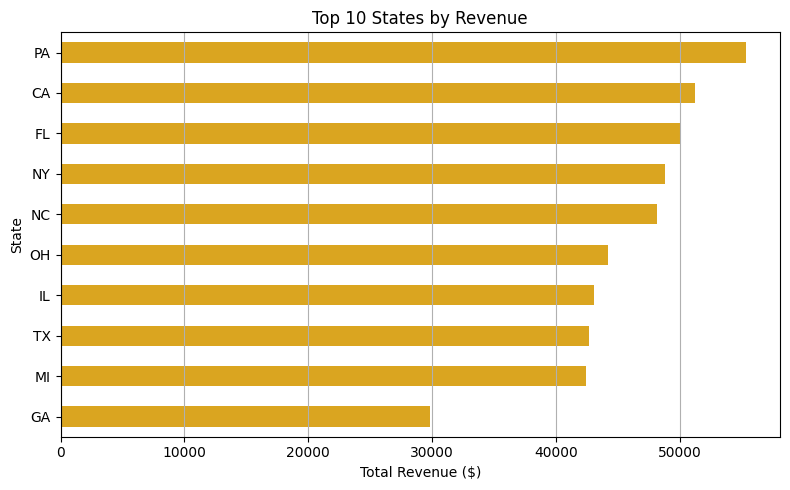

In [16]:
# Group by State and sum revenue
state_sales = df.groupby('State')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
state_sales.plot(kind='barh', color='goldenrod')
plt.title('Top 10 States by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('State')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**Created by Dionte Cape | GitHub: [Dionte18Cape] | Portfolio Ready**
